<a href="https://colab.research.google.com/github/bernlkb/STQD6014-DataScience/blob/main/Week10_Pandas_20231224_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week10:Data Manipulation with Pandas**
Details of codes used in this notebook can be found in this textbook: **Python Data Science Handbook by Jake VanderPlas: https://tinyurl.com/33ha6r7s**

### **Import Pandas and NumPy library**

In [1]:
import numpy as np
import pandas as pd

### **Pandas Series Object - One dimensional array of indexed data**

In [2]:
# Pandas series wraps both a sequence of values and a sequence of indices
data = pd.Series([.25, .5, .75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
# Check data values
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
# Check data index
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# Extract using index - single element
data[1]

0.5

In [6]:
# Extract using index - multiple elements
# Implicit indexing -> inclusive and exclusive rules to follow
data[1:3]

1    0.50
2    0.75
dtype: float64

In [7]:
# Index need not be an integer
# Index can take on "string" format as well
# We can define the indexes ourselves
data = pd.Series([.25, .5, .75, 1.0],
                 index = ['a', 'b', 'c', 'bernard'])
data

a          0.25
b          0.50
c          0.75
bernard    1.00
dtype: float64

In [8]:
# Extract data using index
# Explicit indexing - use labels on purpose
data['a':'bernard']

a          0.25
b          0.50
c          0.75
bernard    1.00
dtype: float64

### **Series as specialized dictionary**

In [9]:
# Create a dictionary
pop_dict = {'California': 38332521,
            'Texas': 26448193,
            'New York': 19651127,
            'Florida': 19552860,
            'Illinois': 12882135}

In [10]:
# Convert dictionary to pandas Series
# Pandas Series -> index & value
population = pd.Series(pop_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
# Convert to pandas DataFrame
# Pandas DataFrame -> we have row name & column name
pd.DataFrame(population)

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [12]:
# Extract using index - use row name to extract
population['California']

38332521

In [13]:
# Extract using index - multiple row names
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

# ***Notes: To extract from Pandas DataFrame, we need to use square bracket "[ ]"***

### **The Pandas DataFrame Object**
DataFrame is a **two-dimensional array** with both flexible row indices and flexible column names

In [30]:
# A dictionary
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
               'Florida': 170312, 'Illinois': 149995}

In [31]:
# Convert to pd Series -> area
area = pd.Series(area_dict)

In [32]:
# Output area content
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [33]:
# Check data type for area
type(area)

pandas.core.series.Series

In [34]:
# Output population content
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [35]:
# Check data type of population
type(population)

pandas.core.series.Series

In [36]:
# Create a pandas DataFrame using population and area Series data -> states
# Use dictionary type to create the DataFrame -> use curly bracket
states = pd.DataFrame({'Populasi': population,
                       'keluasan': area})
states

,Populasi,keluasan
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [42]:
# Extract using index
# Show difference between single bracket vs double bracket
print(states['Populasi']) # Single bracket -> returns a Series format (its original format)
print('\n ---------- \n')
states[['Populasi']] # double bracket -> keep the DataFrame format

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Populasi, dtype: int64

 ---------- 



,Populasi
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [47]:
# Pandas DataFrame formed from 'area' Series
# Without giving the column name -> Pandas will assign numerical value as column name
# column name becomes 0
pd.DataFrame(area)

,0
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [48]:
# Give an explicit name to the column name
# Using the columns() function
pd.DataFrame(area, columns=['keluasan (m^2)'])

,keluasan (m^2)
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [51]:
# Lists formed from a list of dictionaries
data = [{'a': 1, 'b': 2 * i}
        for i in range(3)]
type(data)

list

In [52]:
# Pandas dataframe
pd.DataFrame(data)

,a,b
0,1,0
1,1,2
2,1,4


In [53]:
# Pandas data frame with missing data
# NaN is a special floating-point value
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [54]:
# Form pandas DataFrame using a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2), # dimension of 3x2
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.365503,0.751527
b,0.595819,0.207247
c,0.018462,0.803307


In [58]:
# Challenge
# Create a 3 x 5 data frame
trial = pd.DataFrame(np.random.rand(3, 5), # dimension of 3x5
             columns=['foo', 'bar', 'Ali', 'Abu', 'Ahmad'],
             index=['a', 'b', 'c'])
trial

,foo,bar,Ali,Abu,Ahmad
a,0.266213,0.577359,0.776721,0.456312,0.668712
b,0.307962,0.106381,0.165337,0.979810,0.858275
c,0.926822,0.054077,0.904451,0.326623,0.302864


In [59]:
# Add column # 6 with standard normal data
# Important for final exam
trial['bernard'] = np.random.standard_normal(3)
trial

,foo,bar,Ali,Abu,Ahmad,bernard
a,0.266213,0.577359,0.776721,0.456312,0.668712,-2.452604
b,0.307962,0.106381,0.165337,0.979810,0.858275,1.062610
c,0.926822,0.054077,0.904451,0.326623,0.302864,0.862800


In [62]:
# Division
trial['div'] = trial['foo'] / trial['bar']
trial

,foo,bar,Ali,Abu,Ahmad,bernard,div
a,0.266213,0.577359,0.776721,0.456312,0.668712,-2.452604,0.461087
b,0.307962,0.106381,0.165337,0.979810,0.858275,1.062610,2.894889
c,0.926822,0.054077,0.904451,0.326623,0.302864,0.862800,17.138791


In [65]:
# Max for foo
trial['foo'].max()

0.9268224895724213

### **The Pandas Index Object**

In [66]:
# Create pandas index
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [67]:
# Access individual index
ind[1]

3

In [68]:
# Indexing and a step size of 3
ind[::3]

Int64Index([2, 7], dtype='int64')

### **Index as ordered set**

In [69]:
# Index as ordered set
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [70]:
# Intersection -> '&'
# Returning a new set containing only the elements 'common' to both sets.
indA & indB

<ipython-input-70-8fdb9bcc1f9b>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB


Int64Index([3, 5, 7], dtype='int64')

In [71]:
# Union -> '|'
# Combining the elements of both sets, excluding duplicates.
indA | indB

<ipython-input-71-ab36b74b427e>:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [72]:
# Symmetric difference -> '^'
# Returning a new set containing elements that are unique to each set (not common to both).
indA ^ indB

<ipython-input-72-98cedabd78ef>:3: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB


Int64Index([1, 2, 9, 11], dtype='int64')

# **Data Indexing and Selection**

In [73]:
# Series as dictionary
data = pd.Series([0.25, 0.5, 0.75, 1],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [75]:
# Logical testing
'e' in data

False

In [76]:
# The keys() method is used to retrieve the index labels of the Series
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [78]:
# The items() function -> to get the key and value pair
# Returns a list of tuples where each tuple contains an index-label and its corresponding value from the Series
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [79]:
# Adding new row of data
# always use bracket "[]"
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [80]:
# Slicing by explicit index - on purpose, use the 'labels'
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

# **What is implicit indexing?**
* **Uses the location (numeric) of the indices**
* **Implicit indexing - the index of an item is <font color='red'>*automatically assigned by the system*</font>, typically based on the order or position of the item.**

# **What is explicit indexing?**
* **Explicit indexing is when we <font color='red'>*manually specify or assign the index to each item*</font>.**

In [81]:
# Slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [82]:
# Masking -> Multiple indexing
data[(data > .3) & (data < .8)]

b    0.50
c    0.75
dtype: float64

In [83]:
# Fancy indexing -> by giving a list
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

# **Indexers: loc, & iloc**

In [84]:
# Create a pandas Series
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [85]:
# Explicit index - confusing
data[1]

'a'

In [86]:
# Implicit index - confusing
data[1:3]

3    b
5    c
dtype: object

### **loc attribute** allows indexing and slicing that always references the **explicit index**

In [87]:
# Display the content for data
data

1    a
3    b
5    c
dtype: object

In [88]:
# Explicit index when indexing
data.loc[1]

'a'

In [89]:
# Explicit index when slicing - multiple condition
data.loc[1:3]

1    a
3    b
dtype: object

### **iloc attribute** allows indexing and slicing that always references the ***implicit Python-style index***

In [91]:
# display data content
data

1    a
3    b
5    c
dtype: object

In [90]:
# Using iloc
data.iloc[1]

'b'

In [92]:
# Slicing using iloc
data.iloc[1:3]

3    b
5    c
dtype: object

### **DataFrame as a dictionary**

In [98]:
# DataFrame as a dictionary
data = pd.DataFrame({'area': area, 'pop':population})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [100]:
# Explicit indexing -> DataFrame format
# Using double bracket
data[['area']]

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [101]:
# Logical testing
data.area is data['area']

True

In [102]:
# Not always work!
# because we have 'pop' dataset
data.pop is data['pop']

False

In [104]:
# Adding a new column -> 'density
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# **DataFrame as two-dimensional array**

In [105]:
# Display the content of 'data'
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [106]:
# Transpose the dataframe
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [108]:
# Explicit indexing -> single bracket returns Series
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [113]:
# display content of data
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [114]:
# Implicit indexing
# Using iloc function - using integer indexing method
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [115]:
# Explicit indexing
# Using loc
data.loc[:'Florida', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [117]:
# Complex - Explicit indexing using loc
# additional condition
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [119]:
# Edit value using Implicit indexing method
# Florida & density -> 115
data.iloc[3, 2] = 115
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,115.000000
Illinois,149995,12882135,85.883763


# **Operating on Data in Pandas**

### **Index alignment in Series**

In [120]:
# Create some data
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [121]:
# Compute the population density
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [122]:
# Display the content of area
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [123]:
# Display content of population
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [124]:
# Union of index -> '|'
area.index | population.index

<ipython-input-124-1fb64d670202>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

# **Index alignment in DataFrame**

In [125]:
# Create some data
rng = np.random.RandomState(50)
A = pd.DataFrame(rng.randint(0, 20, (2,2)),
                 columns=list('AB'))
A

,A,B
0,16,0
1,11,13


In [126]:
# Create some data
rng = np.random.RandomState(100)
B = pd.DataFrame(rng.randint(0, 10, (3,3)),
                 columns=list('BAC'))
B

,B,A,C
0,8,8,3
1,7,7,0
2,4,2,5


In [127]:
# Summation
A + B

,A,B,C
0,24.0,8.0,NaN
1,18.0,20.0,NaN
2,NaN,NaN,NaN


# **Pandas DataFrame: stack() function**
* The ***stack()*** function is used to **stack the prescribed level(s) from <font color=red>*columns to index*</font>.**
* For more information, please visit this website: https://tinyurl.com/mt27xnk9
* ***change from wide format to long format***

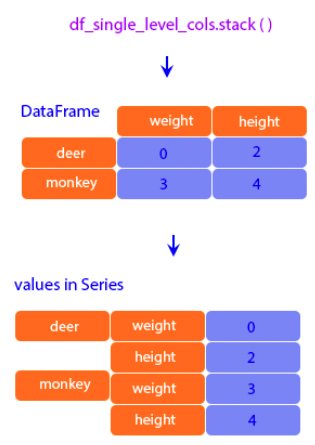

In [128]:
# Display content of A
A

,A,B
0,16,0
1,11,13


In [131]:
# Transform the DataFrame A by stacking its columns to create a new Series
A.stack()

0  A    16
   B     0
1  A    11
   B    13
dtype: int64

In [132]:
# Getting the median
fill = A.stack().median()
fill

12.0

In [133]:
# Summation
A + B

,A,B,C
0,24.0,8.0,NaN
1,18.0,20.0,NaN
2,NaN,NaN,NaN


In [135]:
# Fill every missing value with the above median value
# Very confusing
print(A)
print('\n -------\n')
print(B)
print('\n -------\n')
A.add(B, fill_value = fill)

    A   B
0  16   0
1  11  13

 -------

   B  A  C
0  8  8  3
1  7  7  0
2  4  2  5

 -------



,A,B,C
0,24.0,8.0,15.0
1,18.0,20.0,12.0
2,14.0,16.0,17.0


# **Operations Between DataFrame and Series**

In [136]:
# Create an array
rng = np.random.RandomState(100)
A = rng.randint(10, size=(3, 4))
A

array([[8, 8, 3, 7],
       [7, 0, 4, 2],
       [5, 2, 2, 2]])

In [137]:
# Substraction
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -8,  1, -5],
       [-3, -6, -1, -5]])

In [138]:
# Create a pandas dataframe
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,8,8,3,7
1,7,0,4,2
2,5,2,2,2


In [139]:
# Substraction using implicit indexing
# Using iloc function
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-8,1,-5
2,-3,-6,-1,-5


In [140]:
# Extract information
df['R']

0    8
1    0
2    2
Name: R, dtype: int64

In [144]:
# Another way
# Substration along the rows
df.subtract(df['R'], axis = 0)


,Q,R,S,T
0,0,0,-5,-1
1,7,0,4,2
2,3,0,0,0


# **Dropping null values**

In [145]:
# Create a pandas DataFrame
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [146]:
# dropna() removes NA values - row wise
# Cannot drop single values from a DataFrame
df.dropna()

,0,1,2
1,2.0,3.0,5


In [148]:
# Drops all columns containing a null value
# column wise
df.dropna(axis = 1)

,2
0,2
1,5
2,6


In [149]:
# Display content for df
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [150]:
# Assign missing data
df[3] = np.nan

In [151]:
# Display updated df content
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [152]:
# how='all' & how='any'
# how='all' will only drop rows/columns that are all null values
df.dropna(axis = 1, how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [153]:
# how='any'
df.dropna(axis = 1, how = 'any')

,2
0,2
1,5
2,6


# ***thresh*** parameter lets us specify a ***minimum number of non-null values*** for the row/column to be kept:

In [154]:
# Display df content
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [157]:
# Minimum number of non-null values for the row/column to be kept
# thresh=3
df.dropna(axis = 0, thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [158]:
# Create a pandas series
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [159]:
# fillna with 0
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

# ***Fillna using some permutation***

# ***ffill***: forward-fill; propagate the previous value forward

In [160]:
# Forward fill
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

# **Backward fill**

In [161]:
# backward fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

The ***NA*** value remains if a previous value is not available during a forward fill.

In [164]:
# Display content for df
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [165]:
# NA value remains if a previous value is not available during a forward fill
# axis=1
df.fillna(method='ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# **Pandas MultiIndex**

# **Hierarchical Indexing: incorporate multiple index levels within a single index**


In [166]:
# Hierarchical Indexing - multiple indexing
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [169]:
# Slicing
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [170]:
# Slicing - confusing and messy
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

# **The Better Way: Pandas MultiIndex**

In [171]:
# Create a multi-index from the tuples
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [172]:
# Display original content of pop
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [173]:
# Re-index series with MultiIndex
# Blank entry indicates the same value as the line above it.
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [174]:
# Access all data for which the second index is 2010
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

# **MultiIndex as extra dimension**

In [175]:
# Display original pop content
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [176]:
# Convert a multiple indexed Pandas Series into a conventionally indexed DataFrame
# unstack() -> change back to wide format
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [177]:
# stack() method provides the opposite operation
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [178]:
# Display original pop_df
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [182]:
# Adding another column
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})

In [183]:
# Display original pop content
# Multi index data
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [184]:
# Display pop_df
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [186]:
# Compute the fraction of people under 18 by year
(pop_df['under18'] / pop_df['total']).unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


# **Methods of MultiIndex Creation**

In [187]:
# Pass a list of two or more index arrays
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.515511  0.005851
  2  0.978926  0.345418
b 1  0.942237  0.720625
  2  0.302206  0.768795

In [188]:
# Pass a dictionary with appropriate tuples as keys
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [189]:
# Display pop content
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# **MultiIndex level names**

In [190]:
# Name the levels of the MultiIndex
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [191]:
# Hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# Mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10 # in-place multiplication operation; multiplies each element selected by the slicing operation by 10 and updates the original array
data += 37

# Create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  37.2  41.0  37.3  37.0  36.6
     2      17.0  35.4  40.0  36.1  44.0  36.8
2014 1      40.0  37.3  33.0  36.0  39.0  34.7
     2      47.0  36.6  45.0  37.2  33.0  36.0

In [192]:
# Slicing by the person's name
# explicit indexing by using label
health_data['Guido']

type          HR  Temp
year visit            
2013 1      41.0  37.3
     2      40.0  36.1
2014 1      33.0  36.0
     2      45.0  37.2

# **Indexing and Slicing a MultiIndex**

In [193]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [194]:
# Access single elements by indexing with multiple terms
# Complete slicing
pop['California', 2000]

33871648

In [195]:
# Partial indexing / slicing
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [196]:
# Partial slicing
# using loc function
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [197]:
# Partial indexing
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [198]:
# Selection based on Boolean masks
# condition to meet
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [199]:
# Selection based on fancy indexing
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

# **Multiple indexed DataFrames**

In [200]:
# Display health_data
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  37.2  41.0  37.3  37.0  36.6
     2      17.0  35.4  40.0  36.1  44.0  36.8
2014 1      40.0  37.3  33.0  36.0  39.0  34.7
     2      47.0  36.6  45.0  37.2  33.0  36.0

In [201]:
# Extract Guido's heart rate
health_data['Guido', 'HR']

year  visit
2013  1        41.0
      2        40.0
2014  1        33.0
      2        45.0
Name: (Guido, HR), dtype: float64

In [202]:
# Using the iloc indexer
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      38.0  37.2
     2      17.0  35.4

In [203]:
# Passed a tuple of multiple indices
# Using loc -> explicit indexing
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        38.0
      2        17.0
2014  1        40.0
      2        47.0
Name: (Bob, HR), dtype: float64

In [204]:
# Display health_data content
print(health_data)
print('\n---------------\n')

# Indexing using IndexSlice
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  37.2  41.0  37.3  37.0  36.6
     2      17.0  35.4  40.0  36.1  44.0  36.8
2014 1      40.0  37.3  33.0  36.0  39.0  34.7
     2      47.0  36.6  45.0  37.2  33.0  36.0

---------------



,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,38.0,41.0,37.0
2014,1,40.0,33.0,39.0


# **Stacking and unstacking indices**

In [ ]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Convert a dataset from a stacked multi-index to a simple two-dimensional representation
# level = 0 -> based on state


state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
# Unstack based on level = 1 -> year


year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
# Opposite of unstack() is stack()


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# **Index setting and resetting**

In [ ]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Reset the index


,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
# Build multi index


population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# **Data Aggregations on Multi-Indices**
* Pandas has built-in data aggregation methods, such as ***mean(), sum(), and max()***

In [ ]:
# Display health_data
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  34.8  35.0  37.2  55.0  36.6
     2      41.0  35.9  37.0  37.7  30.0  36.5
2014 1      32.0  38.4  27.0  37.3  54.0  38.4
     2      55.0  38.6  33.0  35.1  40.0  37.6

In [ ]:
# Aggregate average measurements for the two visits each year


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     37.5  35.35  36.0  37.45  42.5  36.55
2014     43.5  38.50  30.0  36.20  47.0  38.00

In [ ]:
# Take the mean among levels on the columns


type,HR,Temp
year,,
2013,38.666667,36.450000
2014,40.166667,37.566667


# **Good Luck and See you all soon!!!** 😀